In [ ]:
# Convert main plot from sigmoid to inverse power
# From RMSE.ipynb and curve_fit_predict_devel.ipynb

# Goal is to fit curves to sample size data
# Then predict final score if 250 samples collected for all cohorts

In [8]:
# Get packages, dictionaries, and function set up
import numpy as np
import json
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Color file URL:
# https://drive.google.com/file/d/1ZoyP-aMOW2TKFNDQraL5ia3jpe6ZgQdA/view?usp=sharing
colors = pd.read_csv('../variance_check/TMP_cohort_colors_n26_20210228.csv', sep = ',', skiprows = 1, names = ['Cohort', 'Hexi'])

counts = {}
scores = {}
errors = {}
header = None

# Sample count response file URL:
# https://www.synapse.org/#!Synapse:syn25915900
with open("Sample_count_response.tsv") as handle:
    for tmp in handle:
        row = tmp.split("\t")
        if header is None:
            header = row
        else:
            n = row[0]
            c = json.loads(row[1])
            s = json.loads(row[2])
            e = json.loads(row[3])
            counts[n] = c
            scores[n] = s
            errors[n] = e
            
# Define curve fitting function
def Y_acc(x, a, b, c): # x is sample size
    Y_acc = (1-a)-b*x**c
    return Y_acc

# Build parameter table
lower = [0,-1000,-1]
upper = [.5,1000,0]
fits = {}
for i,cohort in enumerate(counts):
    f, _ = curve_fit(Y_acc, counts[cohort], scores[cohort], bounds=[lower,upper])
    fits[cohort] = f
fdf = pd.DataFrame(fits).transpose()
fdf.columns = ['a','b','c']

# Define training for linear regression based on max number samples
samples_250 = []
scores_250 = []
for i,cohort in enumerate(counts):
    if counts[cohort][-1] >= 250: # Toggle line, previously 150
        samples_250.append(cohort)
        scores_250.append(scores[cohort][-1])
reg_250 = LinearRegression().fit(fdf.loc[samples_250], scores_250)

In [2]:
fdf

,a,b,c
ACC,1.008579e-22,1.066925,-0.437025
BLCA,1.345644e-01,1.451662,-0.541998
BRCA,9.788530e-16,1.291345,-0.415621
CESC,1.115285e-02,0.994357,-0.556451
COADREAD,1.379605e-01,1.709391,-0.539107
ESCC,1.431993e-12,2.021080,-0.879674
GEA,5.167394e-02,1.086474,-0.338171
HNSC,1.450535e-20,1.702410,-0.372038
KIRCKICH,3.171628e-15,0.477512,-0.525564
KIRP,2.002401e-14,0.760949,-0.324157


In [42]:
fdf.to_csv('Inverse_power_law_parameters.tsv', sep = '\t')

In [43]:
check_parameter_file = pd.read_csv('Inverse_power_law_parameters.tsv', sep = '\t', index_col = 0)

In [44]:
check_parameter_file

,a,b,c
ACC,1.008579e-22,1.066925,-0.437025
BLCA,1.345644e-01,1.451662,-0.541998
BRCA,9.788530e-16,1.291345,-0.415621
CESC,1.115285e-02,0.994357,-0.556451
COADREAD,1.379605e-01,1.709391,-0.539107
ESCC,1.431993e-12,2.021080,-0.879674
GEA,5.167394e-02,1.086474,-0.338171
HNSC,1.450535e-20,1.702410,-0.372038
KIRCKICH,3.171628e-15,0.477512,-0.525564
KIRP,2.002401e-14,0.760949,-0.324157


In [31]:
fits5 = {}
for cohort in counts:
    f, _ = curve_fit(Y_acc, counts[cohort][:5], scores[cohort][:5], bounds=[lower,upper])
    fits5[cohort] = f
fdf5 = pd.DataFrame(fits5).transpose()
fdf5.columns = ['a_test','b_test','c_test']

y_hat = []
for cohort in fdf5.index:
    y_hat.append(round(reg_250.predict(np.array(fdf5.loc[cohort]).reshape(1, -1))[0], 3))

In [32]:
fdf.head(1)

,a,b,c
ACC,1.008579e-22,1.066925,-0.437025


In [33]:
fdf5.head(1)

,a_test,b_test,c_test
ACC,1.585677e-24,1.033796,-0.425112


In [34]:
# Final predicted scores based on inverse power law paramters of
# first 5 sample step sizes using linear regression model fit to
# inverse power law parameters of the 15 cohorts with at least 250 samples

Final_scores = pd.DataFrame()
y_true = []
cohort_list = []
for cohort in counts:
    cohort_list.append(cohort)
    if counts[cohort][-1] == 250:
        y_true.append(scores[cohort][-1])
    else:
        y_true.append('N/A')
Final_scores['Cohort'] = cohort_list
Final_scores['Y_hat'] = y_hat
Final_scores['Y_true'] = y_true

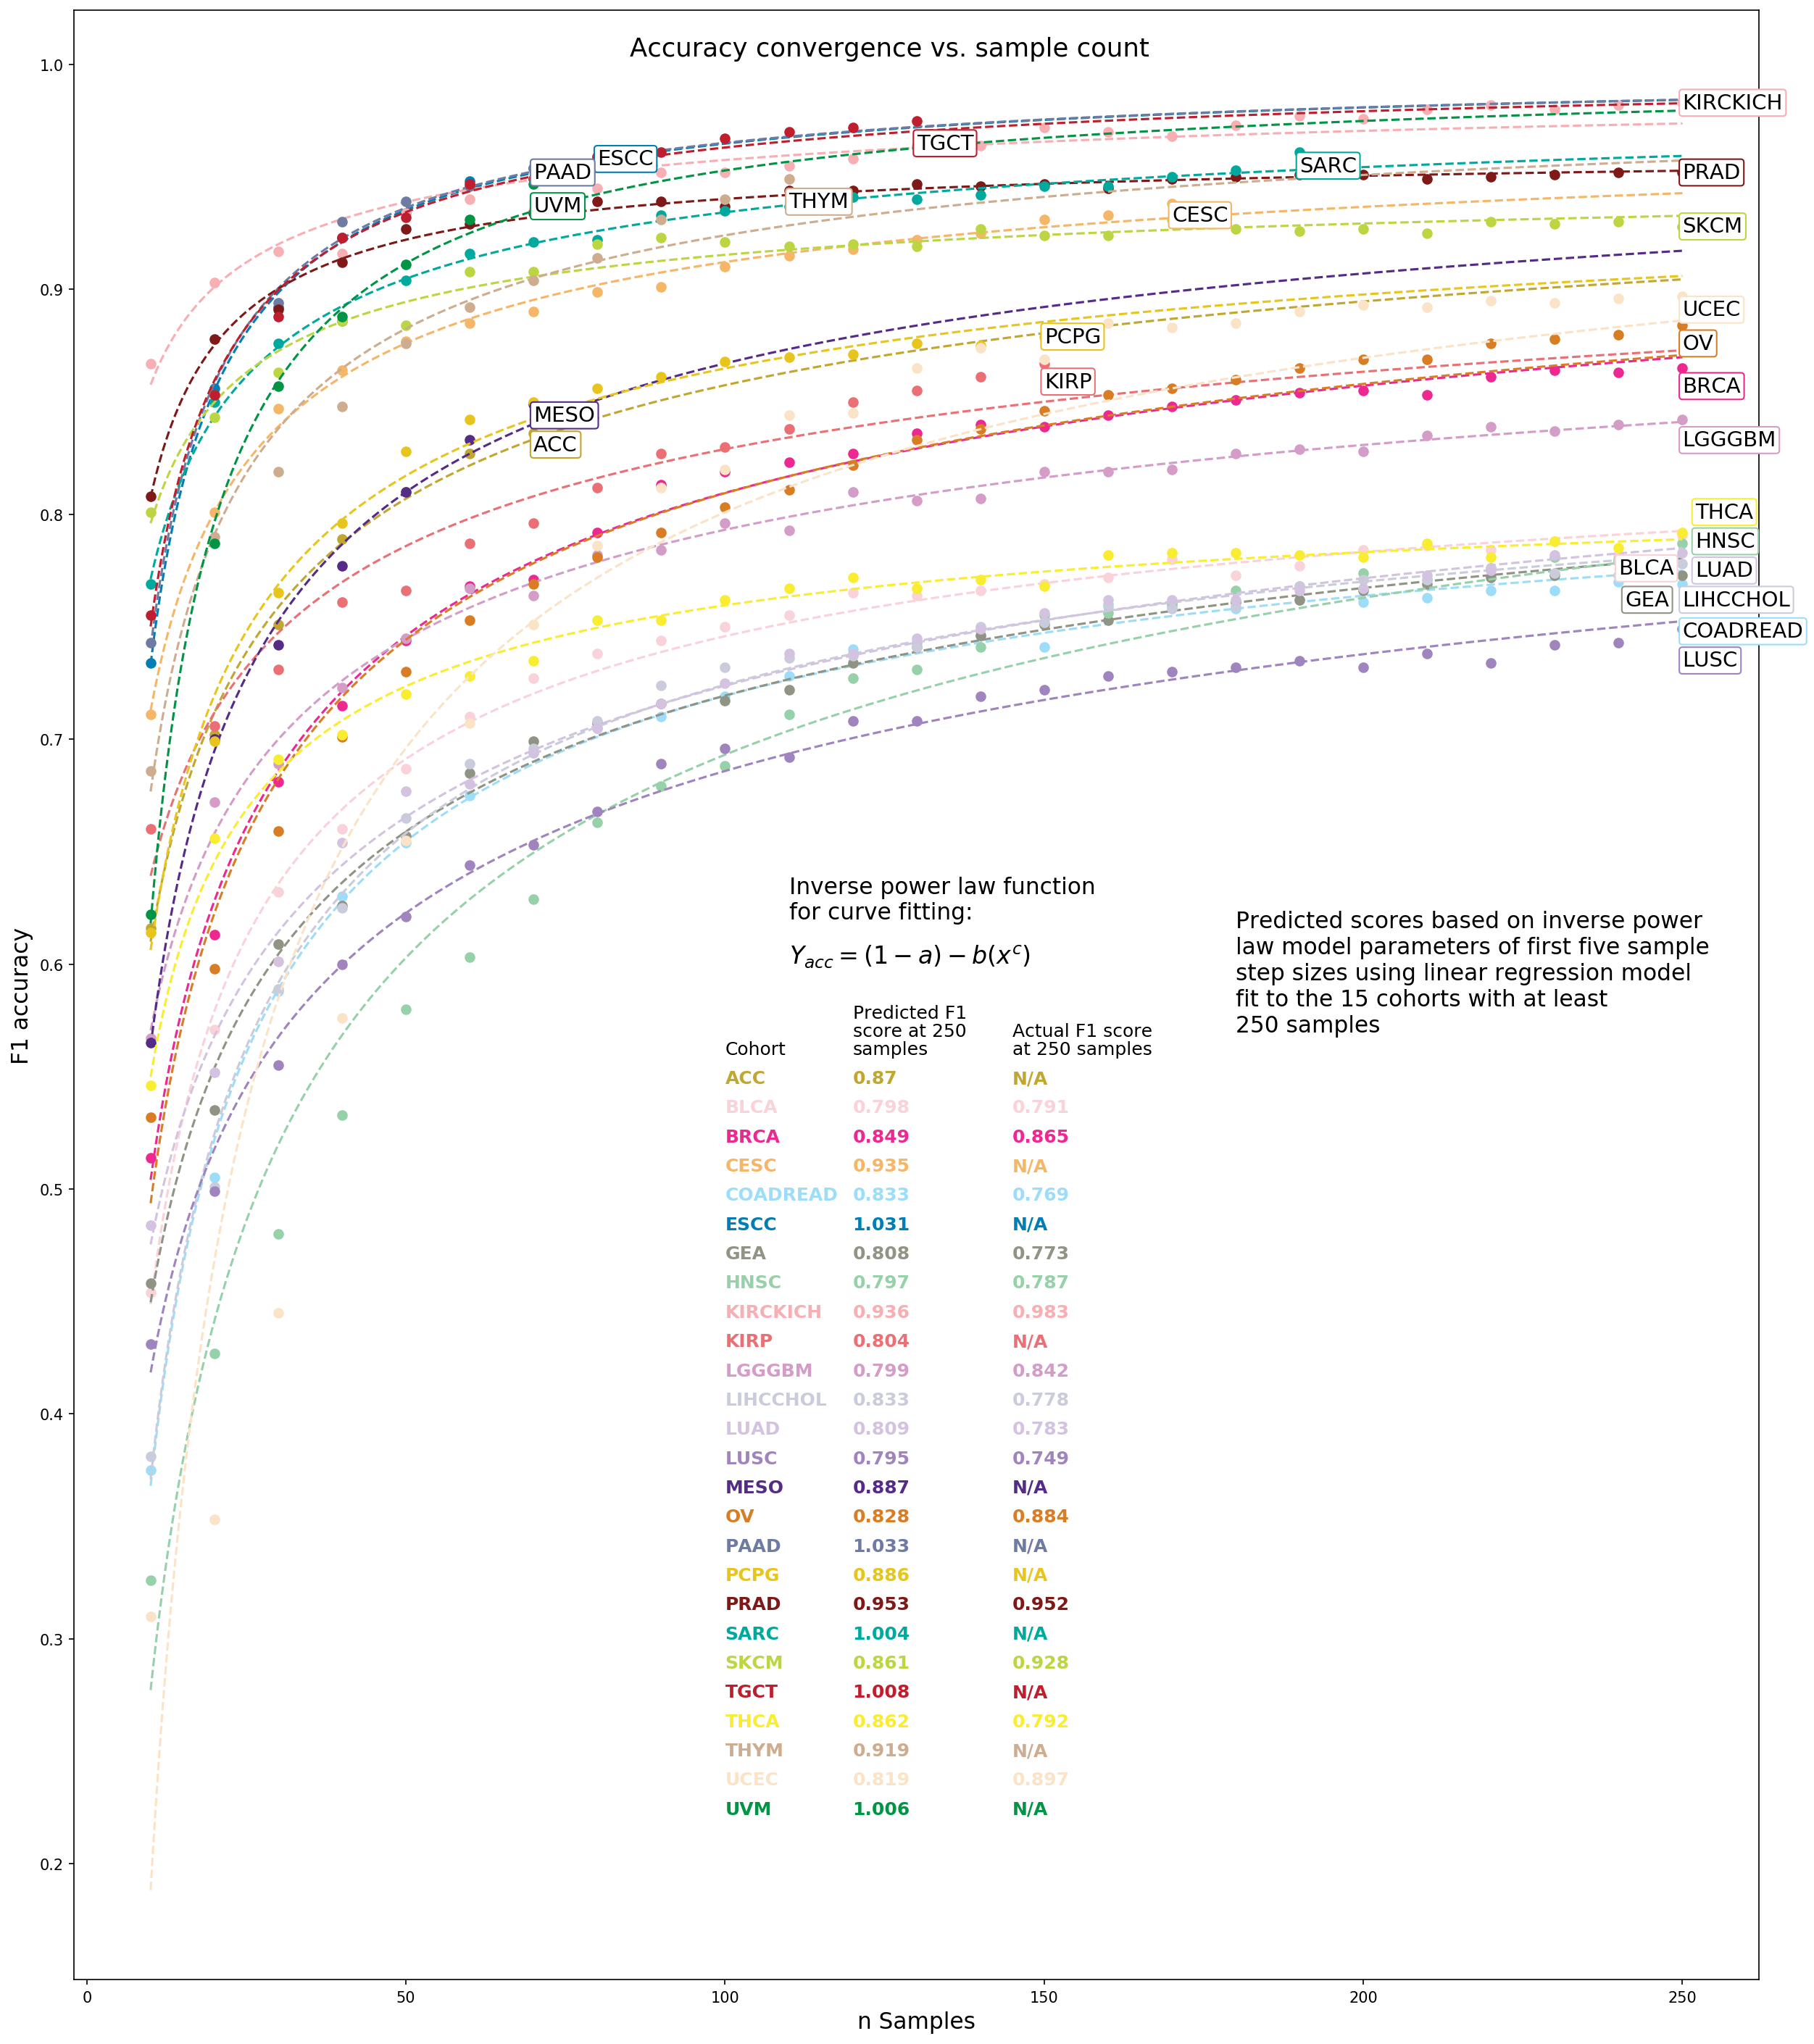

In [35]:
# Plot fitted curves vs. raw data
fig, ax = plt.subplots(figsize = (20,24), dpi = 150)

# Adjust individual cohort labels up and down
offset = [ -.005, -.015, -.008, -.005, -.021,
        #           BLCA        CESC  COADREAD  
          0, -.011, .001,  0,  -.008,
        #     GEA   HNSC       KIRP
          -.009, -.016, -.008, -.014, -.005, -.008,
          
          -.002,   0,   0,  -.006,  0,
#                           SARC
          -.01, .009, -.01, -.006, -.01]
#                            UCEC

# Adjust individual cohort labels side to side
left_shift = [0,  -10,  0,  0,  0,  0,  -9  ,2  ,0,0,
          #                             GEA
             0, 0, 2, 0, 0, 0, 0, 0 ,0, 0,
              
             0,  0,  2,  0,  0,  0]

left_tab = 100
middle_tab = 120
right_tab = 145

y_pos = .56
fs = 12
ax.text(left_tab, y_pos, 'Cohort', fontsize = 12)
ax.text(middle_tab, y_pos+.016, 'Predicted F1', fontsize = 12)
ax.text(middle_tab, y_pos+.008, 'score at 250', fontsize = 12)
ax.text(middle_tab, y_pos, 'samples', fontsize = 12)

ax.text(right_tab, y_pos+.008, 'Actual F1 score', fontsize = 12)
ax.text(right_tab, y_pos, 'at 250 samples', fontsize = 12)

for i,cohort in enumerate(counts): # Use inverse power law function and bounds from block 1
    f, _ = curve_fit(Y_acc, counts[cohort], scores[cohort], bounds=[lower,upper])
    color_shard = colors[colors.Cohort == cohort]
    colr = color_shard.iloc[0,1]
    ax.plot(counts[cohort], scores[cohort], 'o', c = colr)
    ax.text(counts[cohort][-1]+left_shift[i], scores[cohort][-1]+offset[i],
#     ax.text(counts[cohort][-1], scores[cohort][-1],  # Toggle offset and shift      
            cohort,
            fontsize = 14,va='center',
           bbox = dict(facecolor='white', edgecolor=colr, boxstyle='round,pad=0.15'))
    x = np.linspace(10, 250, 1000)
    y = Y_acc(x, *f)  
    ax.plot(x, y, '--', color=colr)
    
    y_pos = y_pos - .013
    
    ax.text(left_tab, y_pos, str(Final_scores.iloc[i,0]), fontsize = fs, color = colr, weight='bold')
    ax.text(middle_tab, y_pos, str(Final_scores.iloc[i,1]), fontsize = fs, color = colr, weight='bold')
    ax.text(right_tab, y_pos, str(Final_scores.iloc[i,2]), fontsize = fs, color = colr, weight='bold')
    
# Print inverse power law on plot
ax.text(110, .62, 'Inverse power law function\nfor curve fitting:', fontsize = 15)
ax.text(110, .6, r'$Y_{acc} = (1-a)-b(x^c)$', fontsize = 16)

ax.text(180, .57, 'Predicted scores based on inverse power\nlaw model parameters of first five '
'sample\nstep sizes using linear regression model\nfit to the 15 cohorts with at least\n250 samples', fontsize = 15)

fig.suptitle('Accuracy convergence vs. sample count', y = .87,fontsize = 17)
ax.set_xlabel('n Samples', fontsize = 15)
ax.set_ylabel('F1 accuracy', fontsize = 15)
# plt.savefig('Inverse_power.png',dpi=300)
plt.show()